In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten, Input 
from tensorflow.keras.utils import plot_model

## Task 01

In [2]:
cifar10 = tf.keras.datasets.cifar10


Split the data to training and testing data

In [3]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


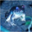

Y class:  [6]





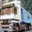

Y class:  [9]





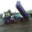

Y class:  [9]





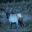

Y class:  [4]





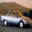

Y class:  [1]





In [5]:
for i in range(0,5):
  
  cv2_imshow( X_train[i])
  print("Y class: ",Y_train[i])
  print("\n\n")

**Preparing a preprocessed normalized data**

In [6]:
X_train = X_train / 255.0

In [7]:
X_test = X_test / 255.0

In [8]:
print(Y_train.shape,Y_test.shape)

(50000, 1) (10000, 1)


In [9]:
#Flattening Y_train, Y_test to 1 Dimension

Y_train= Y_train.flatten()
Y_test= Y_test.flatten()

In [10]:
print(Y_train.shape,Y_test.shape)

(50000,) (10000,)


In [11]:
#no of different classes for target column Y are
n=len(np.unique(Y_train))
print(n)

10


In [38]:
input = Input((32,32,3))
x = Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same')(input)
x = Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
x = Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
x = MaxPooling2D(pool_size =  (2,2))(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(64, activation = 'relu')(x)
output = Dense(10, activation = 'softmax')(x)

model = Model(inputs = input, outputs = output, name = "CIFAR10")
model.summary()

Model: "CIFAR10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 128)       36992     
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 16384)             0         
                                                           

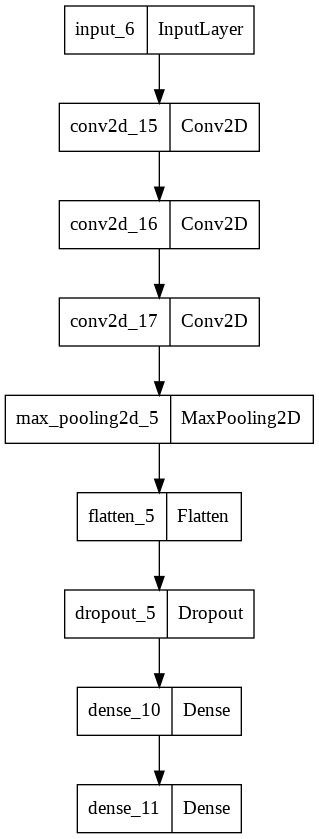

In [39]:
plot_model(model)

In [40]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [42]:
EPOCHS = 20
hist = model.fit(X_train, Y_train, validation_split = 0.2, epochs = EPOCHS)

Epoch 1/20
1250/1250 [==============================] - 23s 19ms/step - loss: 1.3391 - accuracy: 0.5207 - val_loss: 1.1268 - val_accuracy: 0.6049
Epoch 2/20
1250/1250 [==============================] - 22s 17ms/step - loss: 0.9846 - accuracy: 0.6535 - val_loss: 0.9806 - val_accuracy: 0.6626
Epoch 3/20
1250/1250 [==============================] - 22s 17ms/step - loss: 0.8243 - accuracy: 0.7089 - val_loss: 0.9333 - val_accuracy: 0.6738
Epoch 4/20
1250/1250 [==============================] - 23s 18ms/step - loss: 0.7055 - accuracy: 0.7535 - val_loss: 0.8965 - val_accuracy: 0.6964
Epoch 5/20
1250/1250 [==============================] - 23s 18ms/step - loss: 0.6057 - accuracy: 0.7853 - val_loss: 0.8921 - val_accuracy: 0.7052
Epoch 6/20
1250/1250 [==============================] - 22s 17ms/step - loss: 0.5081 - accuracy: 0.8204 - val_loss: 0.9613 - val_accuracy: 0.6968
Epoch 7/20
1250/1250 [==============================] - 22s 17ms/step - loss: 0.4410 - accuracy: 0.8424 - val_loss: 0.9748 -

In [43]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 8ms/step - loss: 1.8166 - accuracy: 0.6837


[1.8166316747665405, 0.6837000250816345]

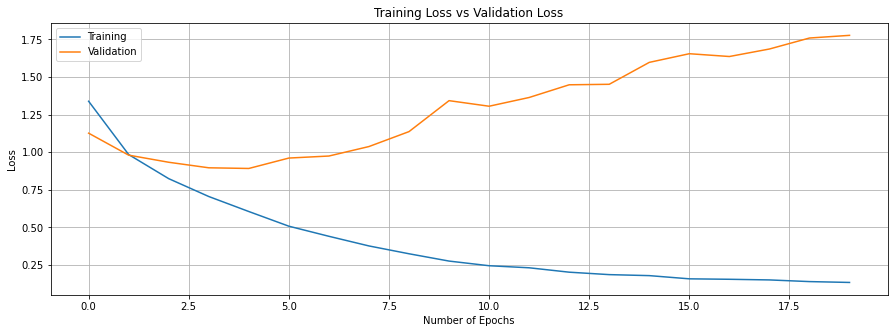

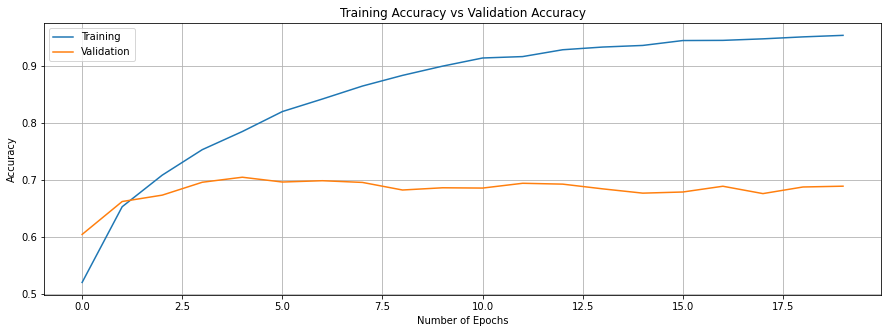

In [44]:
TrainLoss = hist.history['loss']
ValidationLoss = hist.history['val_loss']
TrainAccuracy = hist.history['accuracy']
ValidationAccuracy = hist.history['val_accuracy']
XC = range(EPOCHS)

plt.figure(1,figsize = (15,5))
plt.plot(XC,TrainLoss,label='Training')
plt.plot(XC,ValidationLoss)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Validation Loss')
plt.grid(True)
plt.legend(['Training','Validation'])

plt.figure(2,figsize = (15,5))
plt.plot(XC,TrainAccuracy)
plt.plot(XC,ValidationAccuracy)
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.grid(True)
plt.legend(['Training','Validation'], loc = 2)
plt.show()

## Task 02

In [45]:
cifar100 = tf.keras.datasets.cifar100


Split the data to training and testing data

In [46]:
(X_train, Y_train), (X_test, Y_test) = cifar100.load_data()

169017344/169001437 [==============================] - 2s 0us/step


In [47]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


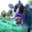

Y class:  [19]





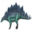

Y class:  [29]





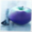

Y class:  [0]





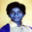

Y class:  [11]





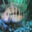

Y class:  [1]





In [48]:
for i in range(0,5):
  
  cv2_imshow( X_train[i])
  print("Y class: ",Y_train[i])
  print("\n\n")

**Preparing a preprocessed normalized data**

In [49]:
X_train = X_train / 255.0

In [50]:
X_test = X_test / 255.0

In [51]:
print(Y_train.shape,Y_test.shape)

(50000, 1) (10000, 1)


In [52]:
#Flattening Y_train, Y_test to 1 Dimension

Y_train= Y_train.flatten()
Y_test= Y_test.flatten()

In [53]:
print(Y_train.shape,Y_test.shape)

(50000,) (10000,)


In [54]:
#no of different classes for target column Y are
n=len(np.unique(Y_train))
print(n)

100


In [85]:
input = Input((32,32,3))
x = Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same')(input)
x = Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
x = Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
x = MaxPooling2D(pool_size =  (2,2))(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(64, activation = 'relu')(x)
output = Dense(100, activation = 'softmax')(x)

model = Model(inputs = input, outputs = output, name = "CIFAR100")
model.summary()

Model: "CIFAR100"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_34 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_35 (Conv2D)          (None, 32, 32, 128)       36992     
                                                                 
 conv2d_36 (Conv2D)          (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 16384)             0         
                                                          

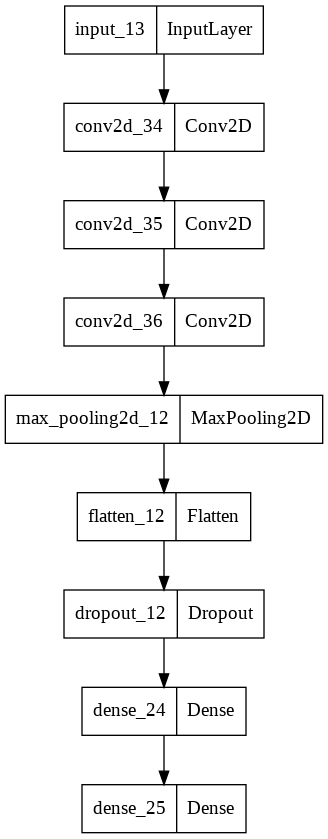

In [86]:
plot_model(model)

In [87]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [88]:
EPOCHS = 35
hist = model.fit(X_train, Y_train, validation_split = 0.2, epochs = EPOCHS)

Epoch 1/35
1250/1250 [==============================] - 23s 18ms/step - loss: 3.9239 - accuracy: 0.1006 - val_loss: 3.4078 - val_accuracy: 0.1757
Epoch 2/35
1250/1250 [==============================] - 23s 18ms/step - loss: 3.2251 - accuracy: 0.2165 - val_loss: 3.0338 - val_accuracy: 0.2505
Epoch 3/35
1250/1250 [==============================] - 22s 17ms/step - loss: 2.8877 - accuracy: 0.2784 - val_loss: 2.8747 - val_accuracy: 0.2860
Epoch 4/35
1250/1250 [==============================] - 22s 17ms/step - loss: 2.6708 - accuracy: 0.3223 - val_loss: 2.7391 - val_accuracy: 0.3117
Epoch 5/35
1250/1250 [==============================] - 22s 17ms/step - loss: 2.5025 - accuracy: 0.3544 - val_loss: 2.6848 - val_accuracy: 0.3237
Epoch 6/35
1250/1250 [==============================] - 22s 17ms/step - loss: 2.3625 - accuracy: 0.3832 - val_loss: 2.6134 - val_accuracy: 0.3417
Epoch 7/35
1250/1250 [==============================] - 22s 17ms/step - loss: 2.2465 - accuracy: 0.4086 - val_loss: 2.6227 -

In [89]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 8ms/step - loss: 3.1911 - accuracy: 0.3673


[3.19107985496521, 0.36730000376701355]

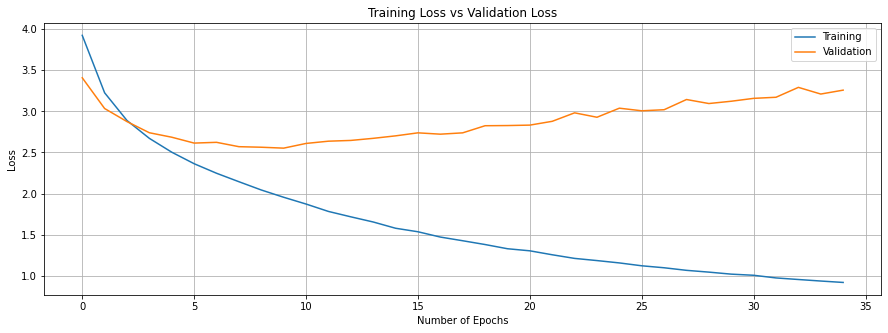

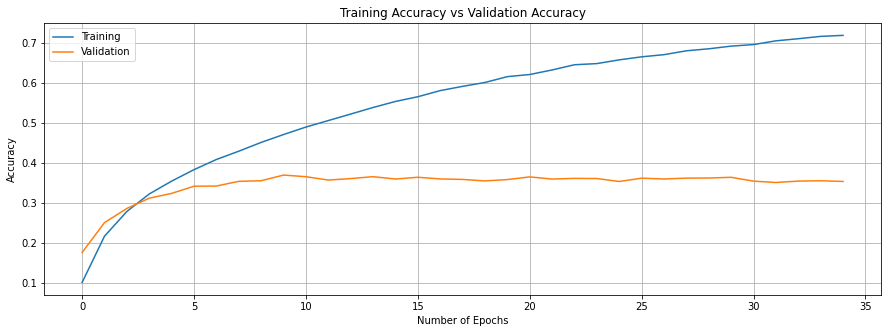

In [90]:
TrainLoss = hist.history['loss']
ValidationLoss = hist.history['val_loss']
TrainAccuracy = hist.history['accuracy']
ValidationAccuracy = hist.history['val_accuracy']
XC = range(EPOCHS)

plt.figure(1,figsize = (15,5))
plt.plot(XC,TrainLoss)
plt.plot(XC,ValidationLoss)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Validation Loss')
plt.grid(True)
plt.legend(['Training','Validation'])

plt.figure(2,figsize = (15,5))
plt.plot(XC,TrainAccuracy)
plt.plot(XC,ValidationAccuracy)
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.grid(True)
plt.legend(['Training','Validation'], loc = 2)
plt.show()

## Task 03

In [109]:
import os
TrainDirectory = "/content/drive/MyDrive/Lab8_datasets/train"
TestDirectory = "/content/drive/MyDrive/Lab8_datasets/val"

X_train = []
Y_train = []
X_test = []
Y_test = []

FixedReshapeSize = (100,100)
for SubDir, Dirs, Files in os.walk(TrainDirectory):
    for FileName in Files:
        FilePath = str(SubDir + os.sep + FileName)
        X_train.append(cv2.resize(cv2.imread(FilePath,1), FixedReshapeSize))
        Y_train.append(SubDir.split("/")[-1])

for SubDir, Dirs, Files in os.walk(TestDirectory):
    for FileName in Files:
        FilePath = str(SubDir + os.sep + FileName)
        X_test.append(cv2.resize(cv2.imread(FilePath,1), FixedReshapeSize))
        Y_test.append(SubDir.split("/")[-1])

X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

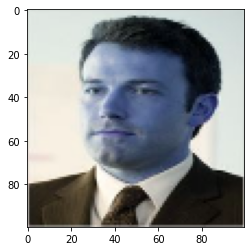

Y class:  ben_afflek





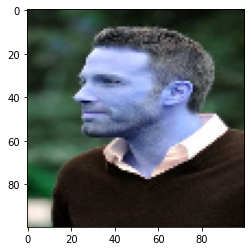

Y class:  ben_afflek





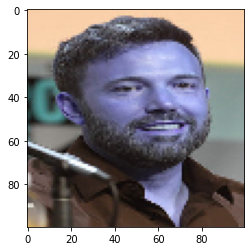

Y class:  ben_afflek





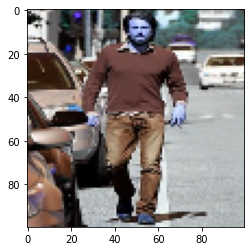

Y class:  ben_afflek





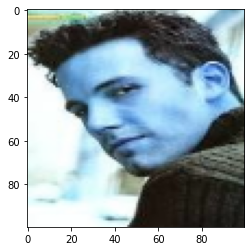

Y class:  ben_afflek





In [112]:
for i in range(0,5):
  plt.imshow(X_train[i])
  plt.show()
  print("Y class: ",Y_train[i])
  print("\n\n")

**Preparing a preprocessed normalized data**

In [113]:
X_train = X_train / 255.0

In [114]:
X_test = X_test / 255.0

In [115]:
print(Y_train.shape,Y_test.shape)

(93,) (25,)


In [116]:
print(Y_train.shape,Y_test.shape)

(93,) (25,)


In [129]:
#no of different classes for target column Y are
n=len(np.unique(Y_train))
print(n)

5


In [118]:
from sklearn.preprocessing import LabelEncoder
ec = LabelEncoder()
Y_train = ec.fit_transform(Y_train)
Y_test = ec.fit_transform(Y_test)

In [212]:
input = Input((100,100,3))
x = Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', padding = 'same')(input)
#x = Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
x = Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
x = MaxPooling2D(pool_size =  (2,2))(x)
x = Flatten()(x)
x = Dense(64, activation = 'relu')(x)
output = Dense(5, activation = 'softmax')(x)

model = Model(inputs = input, outputs = output, name = "5FaceCelebrity")
model.summary()

Model: "5FaceCelebrity"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_30 (InputLayer)       [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_86 (Conv2D)          (None, 100, 100, 16)      448       
                                                                 
 conv2d_87 (Conv2D)          (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 flatten_29 (Flatten)        (None, 80000)             0         
                                                                 
 dense_58 (Dense)            (None, 64)                5120064   
                                                    

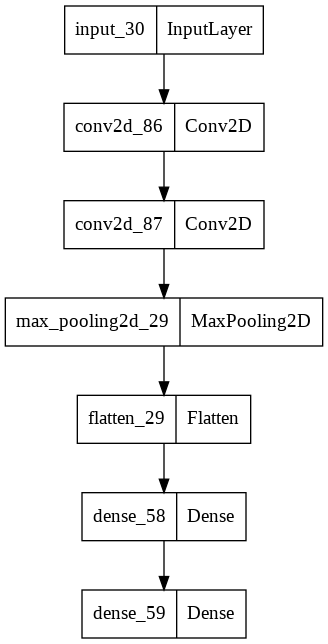

In [213]:
plot_model(model)

In [220]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [221]:
EPOCHS = 20
hist = model.fit(X_train, Y_train, validation_split = 0.1, epochs = EPOCHS)

Epoch 1/20
3/3 [==============================] - 1s 118ms/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 7.1595 - val_accuracy: 0.0000e+00
Epoch 2/20
3/3 [==============================] - 0s 35ms/step - loss: 0.0228 - accuracy: 1.0000 - val_loss: 3.7711 - val_accuracy: 0.2000
Epoch 3/20
3/3 [==============================] - 0s 46ms/step - loss: 0.0385 - accuracy: 1.0000 - val_loss: 1.6524 - val_accuracy: 0.5000
Epoch 4/20
3/3 [==============================] - 0s 36ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 2.0052 - val_accuracy: 0.5000
Epoch 5/20
3/3 [==============================] - 0s 36ms/step - loss: 0.0229 - accuracy: 1.0000 - val_loss: 2.3958 - val_accuracy: 0.4000
Epoch 6/20
3/3 [==============================] - 0s 37ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 3.1756 - val_accuracy: 0.3000
Epoch 7/20
3/3 [==============================] - 0s 37ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 2.4853 - val_accuracy: 0.3000
Epoch 8/20
3/3 [======

In [222]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 29ms/step - loss: 2.1503 - accuracy: 0.4400


[2.150331735610962, 0.4399999976158142]

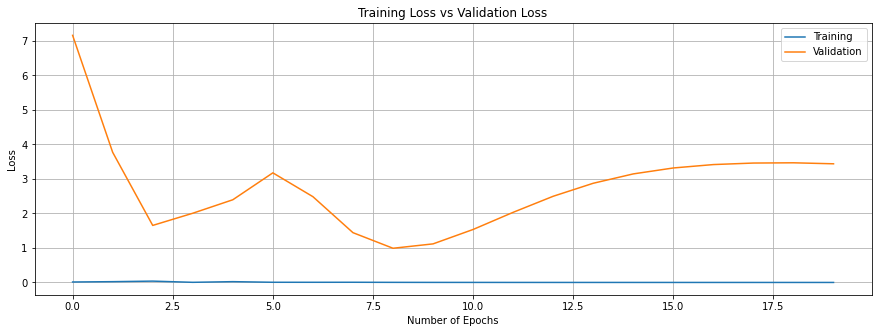

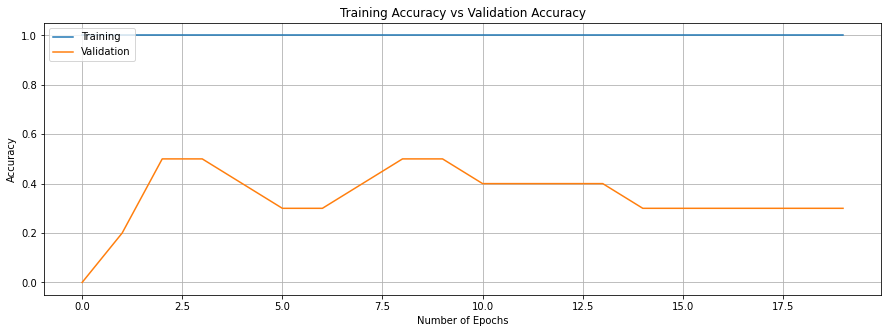

In [223]:
TrainLoss = hist.history['loss']
ValidationLoss = hist.history['val_loss']
TrainAccuracy = hist.history['accuracy']
ValidationAccuracy = hist.history['val_accuracy']
XC = range(EPOCHS)

plt.figure(1,figsize = (15,5))
plt.plot(XC,TrainLoss)
plt.plot(XC,ValidationLoss)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Validation Loss')
plt.grid(True)
plt.legend(['Training','Validation'])

plt.figure(2,figsize = (15,5))
plt.plot(XC,TrainAccuracy)
plt.plot(XC,ValidationAccuracy)
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.grid(True)
plt.legend(['Training','Validation'], loc = 2)
